In [3]:
import pandas as pd
import numpy as np

var_data = pd.read_pickle("../static/variance_raw_2k.pkl")
final_val_data = pd.read_pickle("../static/final_val_raw_2k.pkl")
img_dir = '/home/amanda/Github/attractiveness_datamining/MIT2kFaceDataset/2kfaces'
file_names = list(var_data['Filename'].values)

In [4]:
final_val_data.drop('Filename', axis=1, inplace=True)
final_name_lst = list(final_val_data.columns.values)
final_name_lst = [i + '_final' for i in final_name_lst]
final_val_data.columns = final_name_lst
merge_df = pd.concat([var_data, final_val_data], axis=1, join='inner')

In [5]:
# todo: plot scatter plot of faces' std in multiple dimensions. 
# e.g. 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

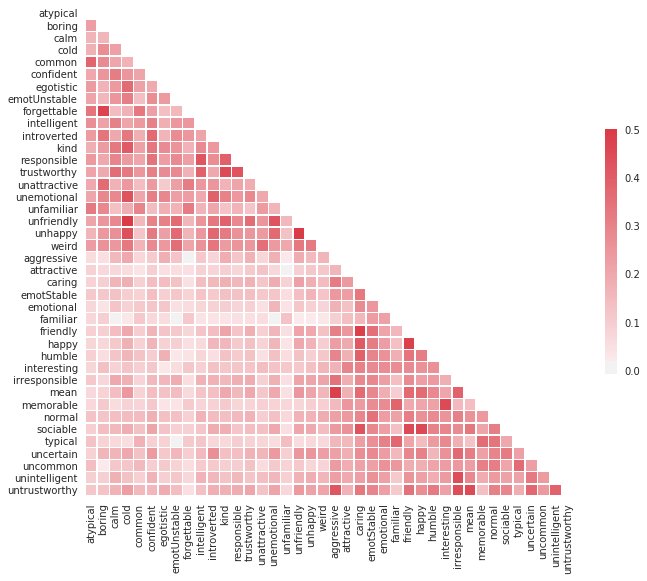

In [32]:
from string import ascii_letters
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
# pd.DataFrame(np.sort(corr.values)[:,-2:-1], columns=['2nd-largest'])

In [6]:
# todo, add final values in the figures. save them. 
import cv2 as cv

In [24]:
import os
font = cv.FONT_HERSHEY_SIMPLEX
img_raw_dir = '/home/amanda/Github/attractiveness_datamining/MIT2kFaceDataset/2kfaces/'
root_dir = '/home/amanda/Documents/variance_viz/'
var_check_feat_lst = ['atypical', 'boring', 'calm', 'cold', 'common', 'confident',
                  'egotistic', 'emotUnstable', 'forgettable', 'intelligent', 'introverted',
                  'kind', 'responsible', 'trustworthy', 'unattractive', 'unemotional',
                  'unfamiliar', 'unfriendly', 'unhappy', 'weird', 'aggressive', 'attractive',
                  'caring', 'emotStable', 'emotional', 'familiar', 'friendly', 'happy',
                  'humble', 'interesting', 'irresponsible', 'mean', 'memorable', 'normal',
                  'sociable', 'typical', 'uncertain', 'uncommon', 'unintelligent', 'untrustworthy']
for cur_feat in var_check_feat_lst:
    print(cur_feat)
    high_dir = root_dir + cur_feat + '/highest/'
    low_dir = root_dir + cur_feat + '/lowest/'
    if not os.path.exists(high_dir):
        os.makedirs(high_dir)
        os.makedirs(low_dir)
    
    sorted_df = merge_df.sort_values(by=[cur_feat])
    
    top_50_filenames = sorted_df[:50]['Filename'].values
    top_50_std_values = sorted_df[:50][cur_feat].values
    top_50_final_values = sorted_df[:50][cur_feat+'_final'].values
    
    low_50_filenames = sorted_df[-50:]['Filename'].values
    low_50_std_values = sorted_df[-50:][cur_feat].values
    low_50_final_values = sorted_df[-50:][cur_feat+'_final'].values
    
    
    for f_n, std_value, ave_value in zip(top_50_filenames, top_50_std_values, top_50_final_values):
        src = img_raw_dir + f_n
        dst = high_dir + str(std_value) + '.jpg'
        std_score = '{0:.1f}'.format(std_value)
        ave_score = '{0:.1f}'.format(ave_value)
        img = cv.imread(src)
        cv.putText(img, 's:'+std_score, (1, 20), font, 0.8, (0, 255, 0), 2, cv.LINE_AA)
        cv.putText(img, 'a:'+ave_score, (100, 20), font, 0.8, (0, 255, 0), 2, cv.LINE_AA)
        cv.imwrite(dst, img)

        
    for f_n, std_value, ave_value in zip(low_50_filenames, low_50_std_values, low_50_final_values):
        src = img_raw_dir + f_n
        dst = low_dir + str(std_value) + '.jpg'
        std_score = '{0:.1f}'.format(std_value)
        ave_score = '{0:.1f}'.format(ave_value)
        img = cv.imread(src)
        cv.putText(img, 's:'+std_score, (1, 20), font, 0.8, (0, 255, 0), 2, cv.LINE_AA)
        cv.putText(img, 'a:'+ave_score, (100, 20), font, 0.8, (0, 255, 0), 2, cv.LINE_AA)
        cv.imwrite(dst, img)

atypical
boring
calm
cold
common
confident
egotistic
emotUnstable
forgettable
intelligent
introverted
kind
responsible
trustworthy
unattractive
unemotional
unfamiliar
unfriendly
unhappy
weird
aggressive
attractive
caring
emotStable
emotional
familiar
friendly
happy
humble
interesting
irresponsible
mean
memorable
normal
sociable
typical
uncertain
uncommon
unintelligent
untrustworthy


In [17]:
import cv2 as cv
test_im = '/home/amanda/Documents/variance_viz/atypical/highest/0.864438.jpg'
img = cv.imread(test_im)
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, 'std:0.4', (1, 20), font, 0.8, (0, 255, 0), 2, cv.LINE_AA)
cv.putText(img, 'ave: 4.5', (100, 20), font, 0.8, (0, 255, 0), 2, cv.LINE_AA)
cv.imwrite('image_test.jpg', img)

True

True